### Анализ бизнес-показателей:

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания разлекательного приложения Procrastinate Pro+ терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс. 


#### 1. Загрузка данных и подготовка их к анализу

Загрузка данных о визитах, заказах и расходах. Оптимизация данных для анализа.
 
#### 2. Создание функций для расчета и анализа LTV, ROI, удержания и конверсии

#### 3. Исследовательский анализ данных

Построение профилей пользователей.

- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### 4. Маркетинг

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### 5. Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI проанализировать:
- Общую окупаемость рекламы;
- Окупаемость рекламы с разбивкой по устройствам;
- Окупаемость рекламы с разбивкой по странам;
- Окупаемость рекламы с разбивкой по рекламным каналам.
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

#### 6. Выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

# 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd # импортируем необходимые библиотеки
import seaborn as sns 
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('visits_info_short.csv',                      # лог сервера 
                     parse_dates=['Session Start', 'Session End']) # с информацией о посещениях сайта
orders = pd.read_csv('orders_info_short.csv',            
                     parse_dates=['Event Dt'])                     # информация о заказах
costs = pd.read_csv('costs_info_short.csv',
                    parse_dates=['dt'])                            # информация о затратах на маркетинг
# на этапе открытия датасетов задаем необходимые типы данных столбцам с датами с помощью 
# параметра parse_dates

Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о покупках, а costs_info_short.csv — информацию о расходах на рекламу.  

Структура visits_info_short.csv:  
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.  

Структура orders_info_short.csv:  
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.  

Структура costs_info_short.csv:  
- Channel — идентификатор рекламного источника,
- Dt — дата проведения рекламной кампании,
- Costs — расходы на эту кампанию.

In [3]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [9]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [11]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Проверим данные на отсутсвие дубликатов:

In [12]:
visits.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
costs.duplicated().sum()

0

# 2. Создание функций для расчета и анализа LTV, ROI, удержания и конверсии

In [15]:
def get_profiles(sessions, orders, ad_costs):
    '''Функция для создания профилей пользователей'''
    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts'].dt.date)
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''Функция для расчета конверсии'''
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    '''Функция для расчета LTV и ROI'''
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):
    '''Функция для визуализации удержания'''
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    '''Функция для визуализации конверсии'''
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [21]:
def filter_data(df, window):
    '''Функция для сглаживания датафрейма'''
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    '''Функция для визуализации LTV и ROI'''
    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# 3. Исследовательский анализ данных

In [23]:
profiles = get_profiles(visits, orders, costs) # получаем профили пользователей
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [24]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [25]:
min_date = profiles['first_ts'].dt.date.min()
max_date = profiles['first_ts'].dt.date.max()
print('Минимальная дата привлечения пользователей:', min_date)
print('Максимальная дата привлечения пользователей:', max_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


**Получим список стран с общим количеством пользователей и долей платящих пользователей от общего числа пользователей.**

In [26]:
profiles_region = (profiles.groupby('region')['user_id'].count()
                           .sort_values(ascending=False).reset_index())
profiles_region_2 = (profiles.query('payer==True')
                             .groupby('region')['payer'].count()
                             .sort_values(ascending=False).reset_index())
profiles_region = profiles_region.merge(profiles_region_2, on='region')
profiles_region['part_of_payers, %'] = profiles_region['payer'] / profiles_region['user_id'] * 100
profiles_region[['region', 'user_id', 'part_of_payers, %']]

,region,user_id,"part_of_payers, %"
0,United States,100002,6.901862
1,UK,17575,3.982930
2,France,17450,3.799427
3,Germany,14981,4.111875


- больше всего пользователей из США
- самая большая доля платящих пользователей приходится на США

**Получим список устройств с общим количеством пользователей и долей платящих пользователей от общего числа пользователей.**

In [27]:
profiles_device = (profiles.groupby('device')['user_id'].count()
                           .sort_values(ascending=False).reset_index())
profiles_device_2 = (profiles.query('payer==True')
                             .groupby('device')['payer'].count()
                             .sort_values(ascending=False).reset_index())
profiles_device = profiles_device.merge(profiles_device_2, on='device')
profiles_device['part_of_payers, %'] = profiles_device['payer'] / profiles_device['user_id'] * 100
profiles_device[['device', 'user_id', 'part_of_payers, %']]

,device,user_id,"part_of_payers, %"
0,iPhone,54479,6.207897
1,Android,35032,5.851793
2,PC,30455,5.046790
3,Mac,30042,6.364423


- больше всего пользователей пользуется iPhone
- самая большая доля платящих пользователей приходится на Mac, на втором месте iPhone

**Получим список каналов привлечения с общим количеством пользователей и долей платящих пользователей от общего числа пользователей.**

In [28]:
profiles_channel = (profiles.groupby('channel')['user_id'].count()
                           .sort_values(ascending=False).reset_index())
profiles_channel_2 = (profiles.query('payer==True')
                             .groupby('channel')['payer'].count()
                             .sort_values(ascending=False).reset_index())
profiles_channel = profiles_channel.merge(profiles_channel_2, on='channel')
profiles_channel['part_of_payers, %'] = profiles_channel['payer'] / profiles_channel['user_id'] * 100
profiles_channel[['channel', 'user_id', 'part_of_payers, %']]

,channel,user_id,"part_of_payers, %"
0,organic,56439,2.055316
1,FaceBoom,29144,12.204914
2,TipTop,19561,9.600736
3,OppleCreativeMedia,8605,2.707728
4,LeapBob,8553,3.063253
5,WahooNetBanner,8553,5.296387
6,RocketSuperAds,4448,7.913669
7,MediaTornado,4364,3.574702
8,YRabbit,4312,3.826531
9,AdNonSense,3880,11.340206


- большая часть пользователей приходят сами, то есть являются органическими, но при этом у органических пользователей самая низкая доля платящих пользователей
- канал FaceBoom на втором месте по количество привлеченных пользователей, при этом у него самый высокий уровень доли платящих пользователей.

# 4. Маркетинг

In [29]:
print('Всего потрачено денег на рекламу в период с {} по {}: {:.1f} руб'
      .format(profiles['first_ts'].dt.date.min(), 
              profiles['first_ts'].dt.date.max(), 
              profiles['acquisition_cost'].sum()))

Всего потрачено денег на рекламу в период с 2019-05-01 по 2019-10-27: 105497.3 руб


**Таблица затрат на маркетинг по каналам:**

In [30]:
(profiles.groupby('channel')['acquisition_cost'].agg(['sum', 'mean'])
                                                .sort_values(by='sum', ascending=False))

,sum,mean
channel,,
TipTop,54751.30,2.799003
FaceBoom,32445.60,1.113286
WahooNetBanner,5151.00,0.602245
AdNonSense,3911.25,1.008054
OppleCreativeMedia,2151.25,0.250000
RocketSuperAds,1833.00,0.412095
LeapBob,1797.60,0.210172
lambdaMediaAds,1557.60,0.724802
MediaTornado,954.48,0.218717


**Таблица затрат на маркетинг по месяцам:**

In [31]:
profiles.groupby('month')['acquisition_cost'].sum().to_frame()

,acquisition_cost
month,
2019-05-01,9978.570
2019-06-01,15090.045
2019-07-01,16447.060
2019-08-01,20657.870
2019-09-01,22441.340
2019-10-01,20882.415


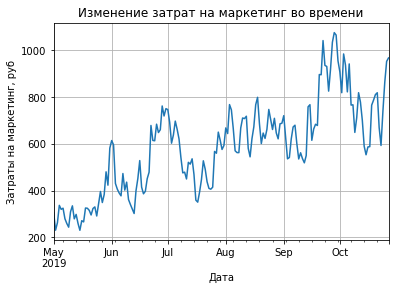

In [32]:
profiles.groupby('dt')['acquisition_cost'].sum().plot(grid=True)
plt.ylabel('Затраты на маркетинг, руб')
plt.xlabel('Дата')
plt.title('Изменение затрат на маркетинг во времени')
plt.show()

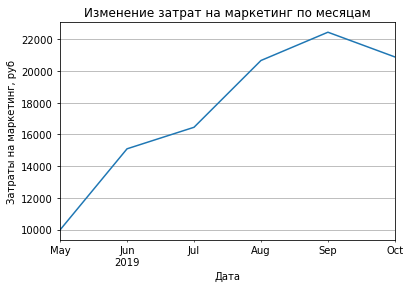

In [33]:
profiles.groupby('month')['acquisition_cost'].sum().plot(grid=True)
plt.ylabel('Затраты на маркетинг, руб')
plt.xlabel('Дата')
plt.title('Изменение затрат на маркетинг по месяцам')
plt.show()

По графикам изменения затрат на маркетинг можно заключить следующее:
- затраты на маркетинг постоянно увеличивались с мая;
- небольшое падение с сентября по октябрь скоррее всего связяно с тем, что данные исследуются от 27 октября, то есть месяц не закрыт до конца, также это доказывает график изменения затрат по дням;
- затраты на маркетинг были увеличены более чем в два раза.

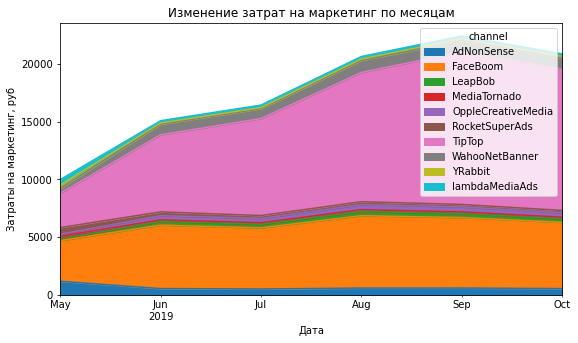

In [34]:
profiles.query('channel!="organic"').pivot_table(index='month', 
                                     columns='channel', 
                                     values='acquisition_cost', 
                                     aggfunc='sum').plot.area(figsize=(9, 5))
plt.ylabel('Затраты на маркетинг, руб')
plt.xlabel('Дата')
plt.title('Изменение затрат на маркетинг по месяцам')
plt.show()

In [35]:
profiles.query('channel!="organic"').pivot_table(index='month', 
                                     columns='channel', 
                                     values='acquisition_cost', 
                                     aggfunc='sum')

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
2019-05-01,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
2019-06-01,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
2019-07-01,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
2019-08-01,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
2019-09-01,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2
2019-10-01,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6


**По данным изменения затрат с разбивкой по каналам привлечения:**   
Большая часть дополнительных затрат на рекламу лежит на каналах FaceBoom и TipTop. В остальных каналах затраты на рекламу в основном уменьшались.

# 5. Оценка окупаемости рекламы для привлечения пользователей

### Проанализируем общую окупаемость рекламы

In [36]:
profiles = profiles.query('channel!="organic"') # исключим органических пользователей

In [37]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles,
                                                      orders,
                                                      datetime(2019, 11, 1).date(),
                                                      14, 
                                                      dimensions=[])

In [38]:
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.117794,0.309163,0.389834,0.451341,0.501962,0.547002,0.58541,0.620991,0.652873,0.684043,0.712711,0.739091,0.762278,0.785579,0.806974


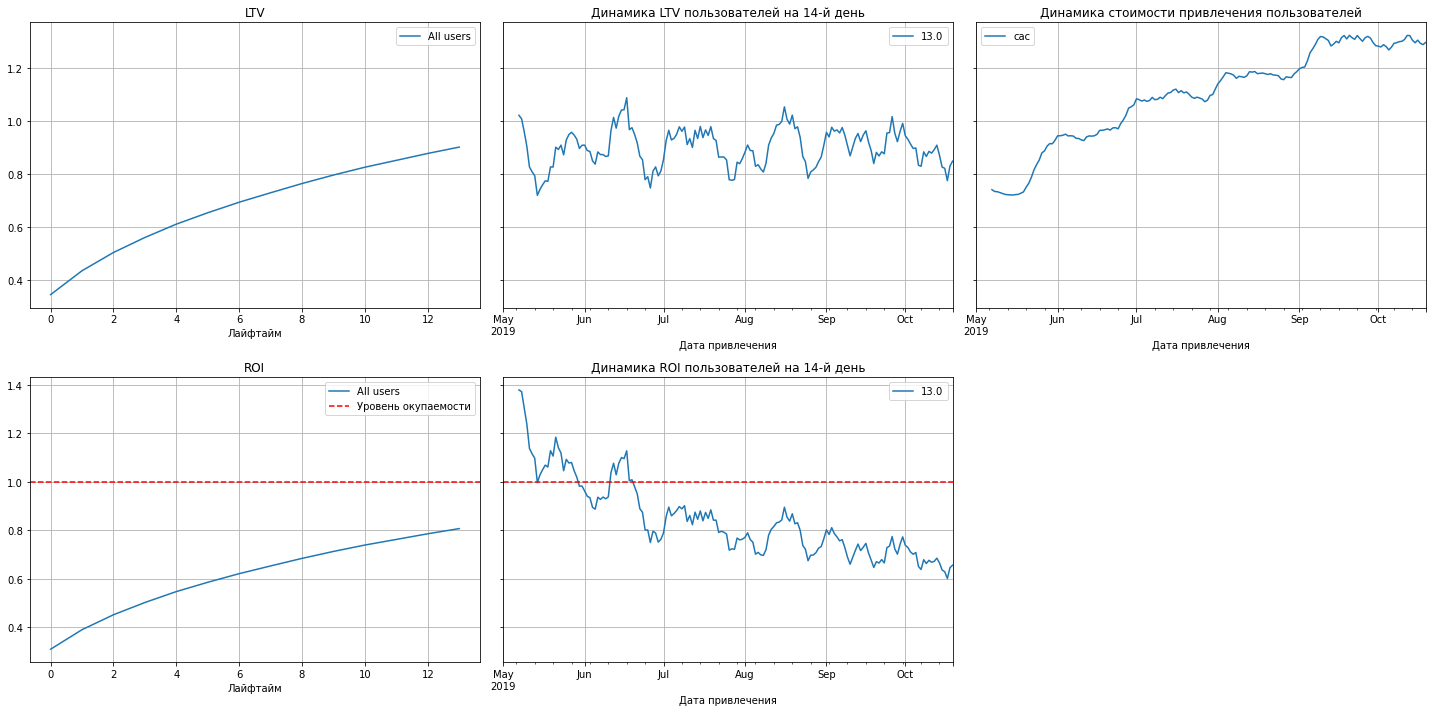

In [39]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Согласно построенным графикам и таблице ROI можно сделать следующие выводы:
- LTV держится примерно на одном уровне в течение всего периода наблюдений;
- ROI постепенно убывает, пересекая уровень окупаемости в сторону убыточности;
- За двухнедельный период ROI (0,8) не пересекает уровень окупаемости;
- CAC увеличивается на протяжении всей истории наблюдений;
- **LTV условно постоянный, CAC увеличивается, а ROI уменьшается. Первоначальное предположение - компания начала тратить больше денег на неэффективную рекламу, таким образом не увеличивая LTV, а просто снижая ROI за счет увеличения затрат на привлечение клиентов CAC;**
- Повышенные затраты на маркетинг (относительно первого месяца наблюдений) не привели к увеличению LTV и ROI.

### Проанализируем окупаемость рекламы с разбивкой по устройствам

In [40]:
ltv_raw_2, ltv_2, ltv_history_2, roi_2, roi_history_2 = get_ltv(profiles,
                                                        orders,
                                                        datetime(2019, 11, 1).date(),
                                                        14, 
                                                        dimensions=['device'])

In [41]:
roi_2

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,20683,1.019759,0.332645,0.422419,0.490517,0.544460,0.596376,0.648580,0.686250,0.724251,0.758989,0.791216,0.817714,0.839481,0.870765,0.894425
Mac,17747,1.276219,0.299506,0.376283,0.431058,0.474117,0.510255,0.537354,0.565601,0.589926,0.619766,0.646735,0.671809,0.692961,0.708825,0.729139
PC,18128,0.792724,0.349933,0.456068,0.542966,0.612637,0.680712,0.733701,0.796291,0.835044,0.884297,0.920135,0.960624,0.994933,1.024449,1.054801
iPhone,32086,1.277021,0.288114,0.357321,0.410253,0.456661,0.495005,0.527449,0.556536,0.587035,0.610762,0.636023,0.658115,0.679258,0.700380,0.718064


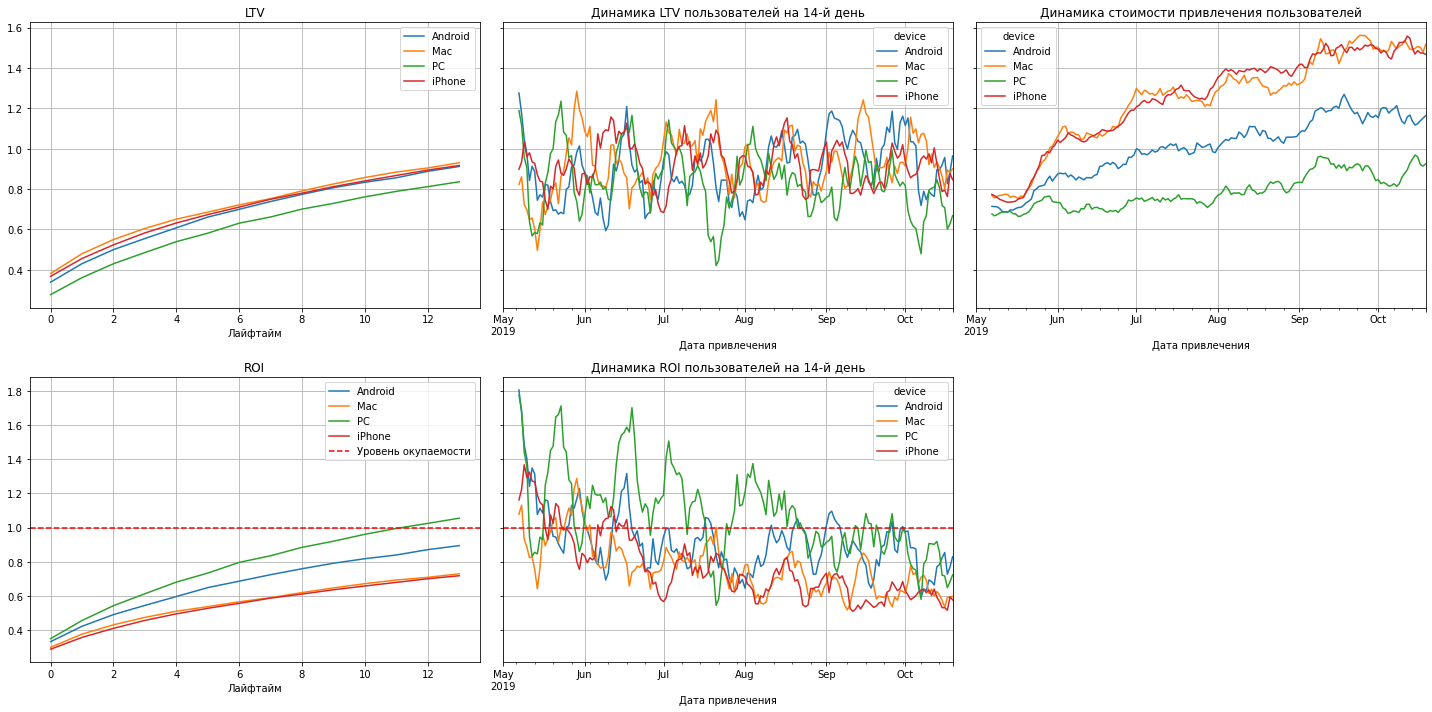

In [42]:
plot_ltv_roi(ltv_2, ltv_history_2, roi_2, roi_history_2, 14, window=7)

По данным ROI и LTV с разбивкой по устройствам: 
- Пользователи PC пересекают уровень окупаемости, в отличие от пользователей с iPhone и Mac и Android;
- Стоимость привлечения пользователей CAC значительно ниже у PC и Android по сравнению с пользователями устройств Apple;
- Также привлечение пользователей с устройствами Apple увеличиваются значительнее и быстрее по сравнению с пользователями Android и PC (при это CAC у PC почти не менятся);
- При этом LTV у пользователей со всеми устройствами примерно одинаковый.

### Проанализируем окупаемость рекламы с разбивкой по странам

In [43]:
ltv_raw_3, ltv_3, ltv_history_3, roi_3, roi_history_3 = get_ltv(profiles,
                                                        orders,
                                                        datetime(2019, 11, 1).date(),
                                                        14, 
                                                        dimensions=['region'])

In [44]:
roi_3

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,,
France,10516,0.459836,0.420645,0.564947,0.677842,0.783319,0.884863,0.978985,1.046066,1.103029,1.177559,1.241542,1.304903,1.352373,1.413265,1.457644
Germany,9030,0.464898,0.400840,0.556806,0.705411,0.807645,0.909395,0.991414,1.068917,1.148797,1.228449,1.302148,1.379887,1.432426,1.487111,1.533709
UK,10536,0.454922,0.480704,0.652335,0.808109,0.915777,1.023264,1.107802,1.222385,1.287350,1.371094,1.418984,1.470208,1.521847,1.582249,1.634306
United States,58562,1.455876,0.288682,0.356923,0.405928,0.447689,0.483222,0.513729,0.541018,0.567254,0.590622,0.613990,0.634347,0.653111,0.670649,0.687776


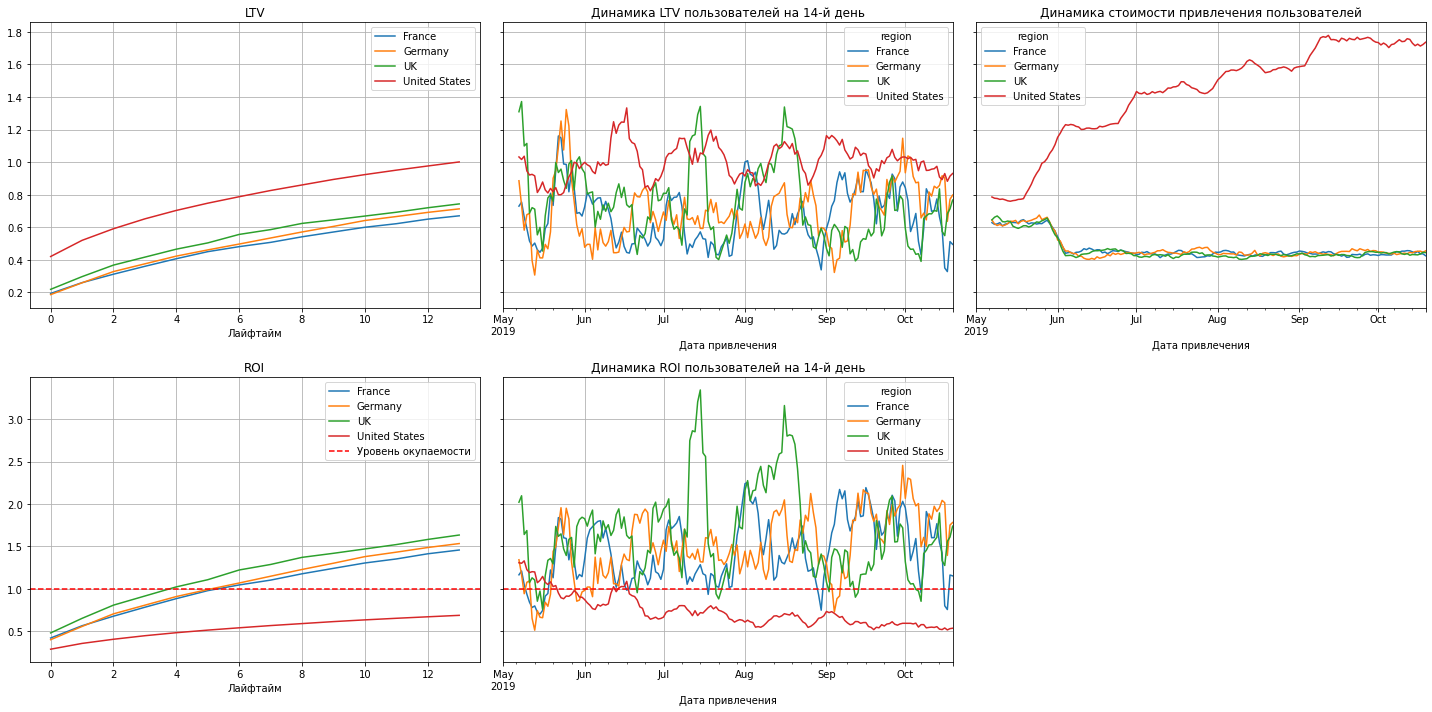

In [45]:
plot_ltv_roi(ltv_3, ltv_history_3, roi_3, roi_history_3, 14, window=7)

Согласно анализу окупаемости рекламы с разбивкой по странам:
- Пользователи из регионов Франция, Германия и Англия пересекают уровень окупаемости ROI уже на 3-4 день после привлечения;
- Затраты на привлечение пользователей из США не окупаются даже через 2 недели;
- По динамике CAC видно, что стоимость привлечения пользователей из Европы даже уменьшилась, в то время как затраты на привлечение пользователей из США увеличились в разы, что и привело к недостижению уровня окупаемости, так как по динамике ROI можно увидеть, что в мае, когда затраты на рекламу еще не увеличились, то даже пользователи из США окупались;
- При этом у пользователей из США лучший показатель LTV, то есть пользователи из США являются ценными, но из-за слишком дорогой рекламы в регионе не окупаются.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

In [46]:
ltv_raw_4, ltv_4, ltv_history_4, roi_4, roi_history_4 = get_ltv(profiles,
                                                        orders,
                                                        datetime(2019, 11, 1).date(),
                                                        14, 
                                                        dimensions=['channel'])

In [47]:
roi_4

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.008023,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.210000,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.249908,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.601856,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


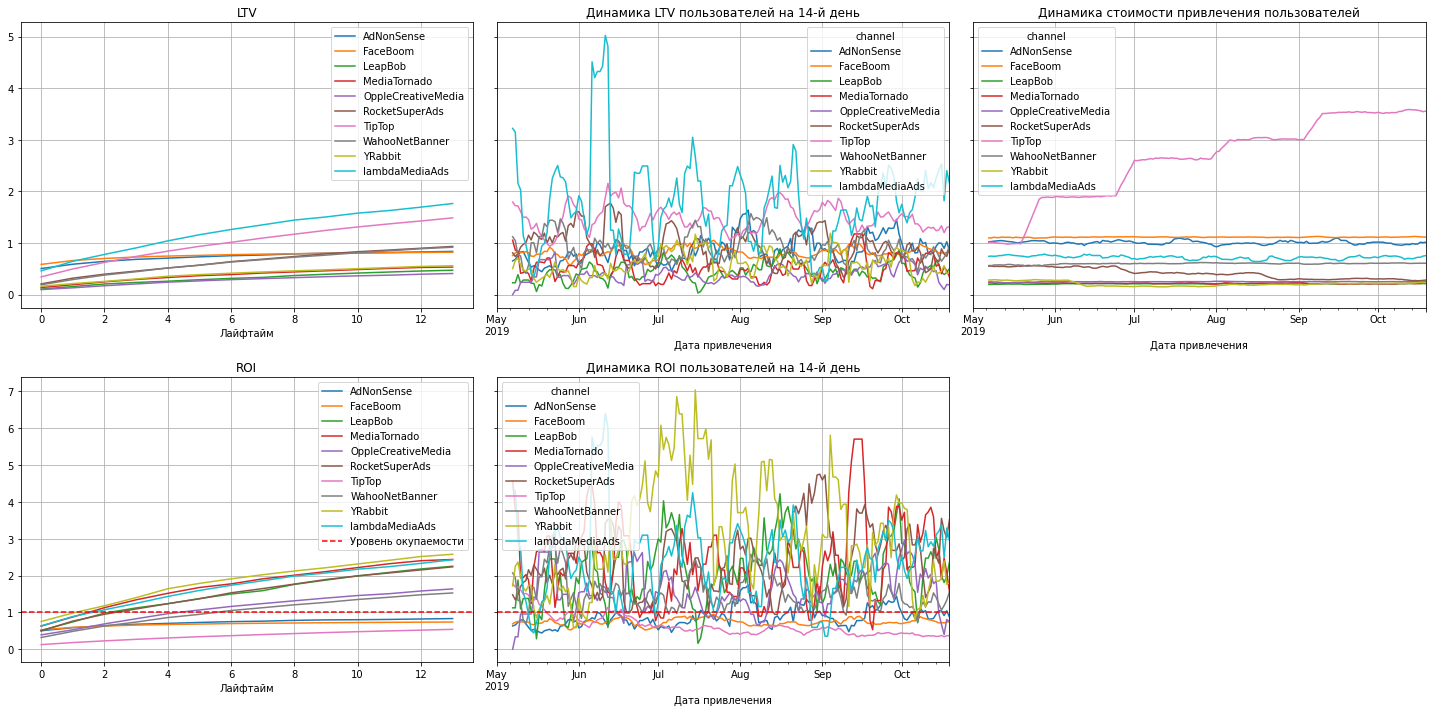

In [48]:
plot_ltv_roi(ltv_4, ltv_history_4, roi_4, roi_history_4, 14, window=7)

Согласно анализу окупаемость рекламы с разбивкой по рекламным каналам:
- затраты на рекламу не окупаются из каналов AdNonSense, TipTop, FaceBoom;
- по динамике CAC видно, что затраты на привлечение пользователей через канал TipTop росли каждый месяц и достигли чрезвычайно высокой стоимости относительно других каналов;
- самые 'ценные' пользователи привлекаются через канал lambdaMediaAds;
- у каналов TipTop и FaceBoom самый высокий охват аудитории, судя по размерам когорт, но реклама в этих каналах не окупается из-за самой высокой стоимости.

### Проверим предположение о влиянии каналов AdNonSense, TipTop и FaceBoom на общую окупаемость

Исключим пользователей, привлеченных через данные каналы, чтобы проверить общую окупаемость:

In [49]:
bad_channel = ['AdNonSense', 'TipTop', 'FaceBoom']
ltv_raw_new, ltv_new, ltv_history_new, roi_new, roi_history_new = get_ltv((profiles
                                                                           .query('channel not in @bad_channel')),
                                                                           orders,
                                                                           datetime(2019, 11, 1).date(),
                                                                           14, 
                                                                           dimensions=[])

In [50]:
roi_new

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,38900,0.351484,0.459044,0.661424,0.840345,0.983431,1.127988,1.246384,1.364007,1.459192,1.562435,1.649448,1.73923,1.811788,1.890778,1.953334


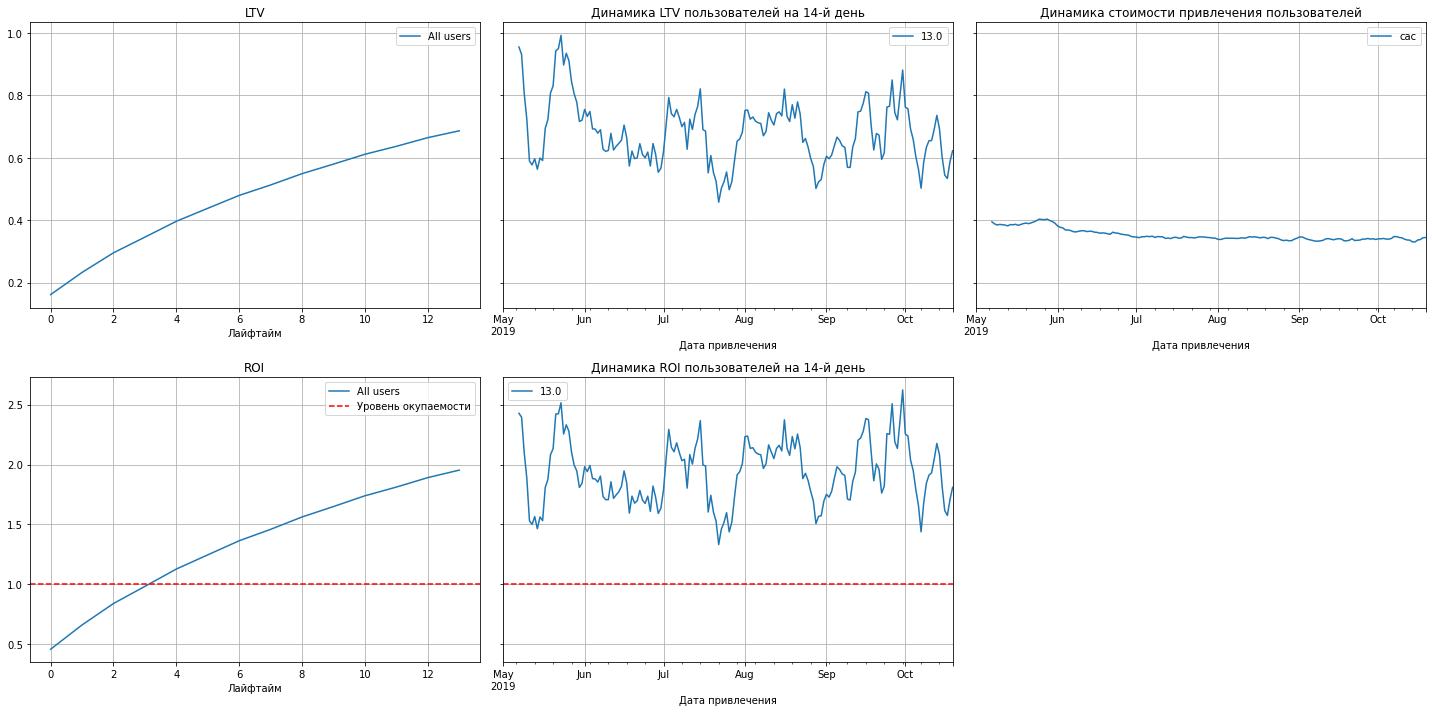

In [51]:
plot_ltv_roi(ltv_new, ltv_history_new, roi_new, roi_history_new, 14, window=7)

**Исключив каналы AdNonSense, TipTop и FaceBoom, получаем, что затраты на маркетинг окупаются уже в третий день, то есть уровень окупаемости кривая ROI пересекает практически в начале графика.**

В исследовании окупаемости с разбивкой по странам получилось, что европейские страны окупаются, а США нет. **Проверим, как изменилась ситуация после исключения пользователей, привлеченных через каналы AdNonSense, TipTop и FaceBoom (строим LTV, CAC и ROI в разбивке по странам уже без "убыточных" каналов):** 

In [52]:
ltv_raw_new_2, ltv_new_2, ltv_history_new_2, roi_new_2, roi_history_new_2 = get_ltv((profiles
                                                                                     .query('channel not in @bad_channel')),
                                                                                     orders,
                                                                                     datetime(2019, 11, 1).date(),
                                                                                     14, 
                                                                                     dimensions=['region'])

In [53]:
roi_new_2

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,,
France,9211,0.382239,0.403945,0.580593,0.714386,0.845078,0.977457,1.092263,1.181561,1.255544,1.356490,1.440116,1.525438,1.586384,1.667181,1.721038
Germany,7870,0.384785,0.354286,0.534238,0.718826,0.845721,0.974910,1.082022,1.181224,1.287017,1.379301,1.473230,1.577703,1.648889,1.716459,1.777762
UK,9299,0.381328,0.467057,0.663586,0.855850,0.987311,1.125564,1.232798,1.375013,1.457197,1.564764,1.626682,1.695921,1.762907,1.841737,1.910694
United States,12520,0.285760,0.593994,0.846480,1.051790,1.232299,1.408093,1.550640,1.687353,1.807310,1.917805,2.027168,2.129267,2.219934,2.306970,2.372806


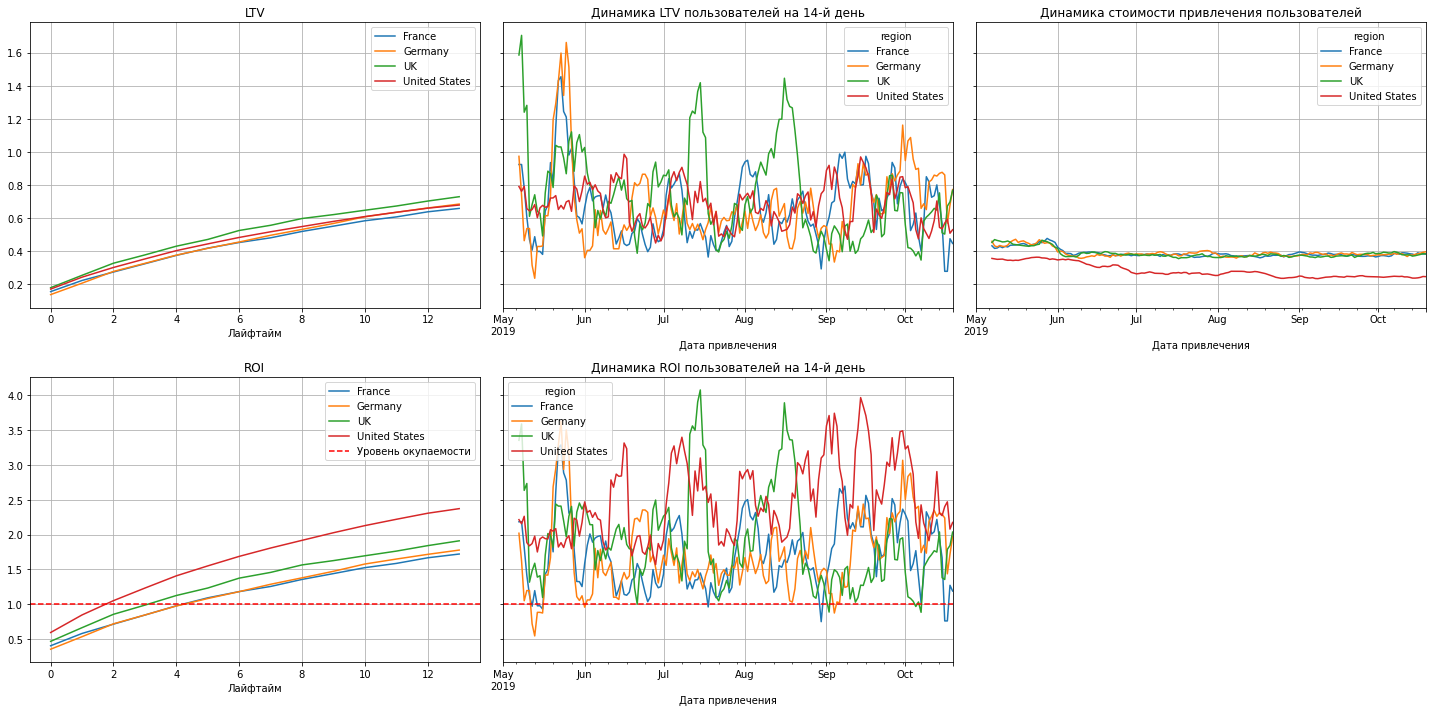

In [54]:
plot_ltv_roi(ltv_new_2, ltv_history_new_2, roi_new_2, roi_history_new_2, 14, window=7)

Из анализа окупаемости с разбивкой по странам без убыточных каналов привлечения оказалось, что пользователи из США наиболее быстро окупаемые, а CAC у них минимальный. Хотя до исключения убыточных каналов привлечения было наоборот, пользователи из США не окупались вовсе.

## Исследование удержания пользователей

### Исследование общего уровня удержания

In [55]:
retention_raw, retention, retention_history = get_retention(profiles,
                                                            visits,
                                                            datetime(2019, 11, 1).date(),
                                                            14,
                                                            dimensions=[],
                                                            ignore_horizon=False)

In [56]:
retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


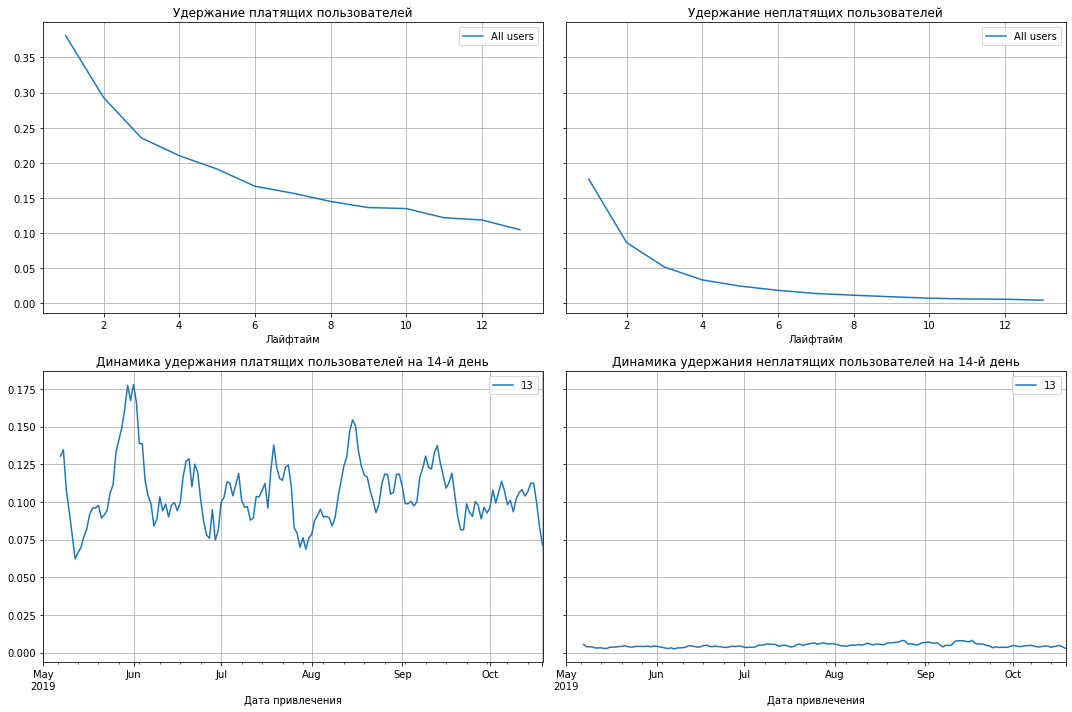

In [57]:
plot_retention(retention, retention_history, 14, window=7)

Данные удержания выглядят приемлимо, у платящих пользователей уровень удержания выше, динамика удержания также выглядит довольно стабильно. Проверим данные по удержанию в разбивке по каналам и странам.

### Исследование удержания в разбивке по каналам

In [58]:
retention_raw_2, retention_2, retention_history_2 = get_retention(profiles,
                                                                  visits,
                                                                  datetime(2019, 11, 1).date(),
                                                                  14,
                                                                  dimensions=['channel'],
                                                                  ignore_horizon=False)

In [59]:
retention_history_2

cohort_size    0         1         2  \
payer channel        dt                                                 
False AdNonSense     2019-05-01           36  1.0  0.222222  0.000000   
                     2019-05-02           36  1.0  0.111111  0.083333   
                     2019-05-03           42  1.0  0.142857  0.095238   
                     2019-05-04           45  1.0  0.133333  0.066667   
                     2019-05-05           31  1.0  0.322581  0.064516   
...                                      ...  ...       ...       ...   
True  lambdaMediaAds 2019-10-13            2  1.0  1.000000  0.500000   
                     2019-10-14            1  1.0  0.000000  1.000000   
                     2019-10-15            3  1.0  0.666667  0.666667   
                     2019-10-16            1  1.0  1.000000  0.000000   
                     2019-10-18            2  1.0  1.000000  1.000000   

                                        3         4         5         6  \
payer channel        dt                                                   
False AdNonSense     2019-05-01  0.111111  0.027778  0.000000  0.027778   
                     2019-05-02  0.027778  0.027778  0.000000  0.055556   
                     2019-05-03  0.047619  0.023810  0.023810  0.047619   
                     2019-05-04  0.044444  0.022222  0.022222  0.000000   
                     2019-05-05  0.064516  0.032258  0.000000  0.032258   
...                                   ...       ...       ...       ...   
True  lambdaMediaAds 2019-10-13  0.000000  1.000000  0.500000  0.500000   
                     2019-10-14  0.000000  0.000000  0.000000  1.000000   
                     2019-10-15  0.666667  0.333333  0.333333  0.333333   
                     2019-10-16  1.000000  0.000000  0.000000  0.000000   
                     2019-10-18  1.000000  0.000000  0.000000  0.000000   

                                       7         8         9        10  \
payer channel        dt                                                  
False AdNonSense     2019-05-01  0.00000  0.000000  0.027778  0.000000   
                     2019-05-02  0.00000  0.055556  0.000000  0.000000   
                     2019-05-03  0.02381  0.000000  0.000000  0.000000   
                     2019-05-04  0.00000  0.000000  0.000000  0.000000   
                     2019-05-05  0.00000  0.000000  0.000000  0.000000   
...                                  ...       ...       ...       ...   
True  lambdaMediaAds 2019-10-13  0.00000  0.500000  0.000000  0.000000   
                     2019-10-14  0.00000  0.000000  1.000000  0.000000   
                     2019-10-15  0.00000  0.333333  0.000000  0.333333   
                     2019-10-16  1.00000  0.000000  0.000000  0.000000   
                     2019-10-18  0.50000  1.000000  0.500000  0.500000   

                                       11        12        13  
payer channel        dt                                        
False AdNonSense     2019-05-01  0.000000  0.000000  0.027778  
                     2019-05-02  0.055556  0.055556  0.027778  
                     2019-05-03  0.000000  0.000000  0.000000  
                     2019-05-04  0.000000  0.000000  0.000000  
                     2019-05-05  0.000000  0.000000  0.000000  
...                                   ...       ...       ...  
True  lambdaMediaAds 2019-10-13  0.000000  0.500000  0.000000  
                     2019-10-14  1.000000  0.000000  1.000000  
                     2019-10-15  0.333333  0.000000  0.666667  
                     2019-10-16  0.000000  0.000000  0.000000  
                     2019-10-18  0.500000  0.000000  0.500000  

[3082 rows x 15 columns]

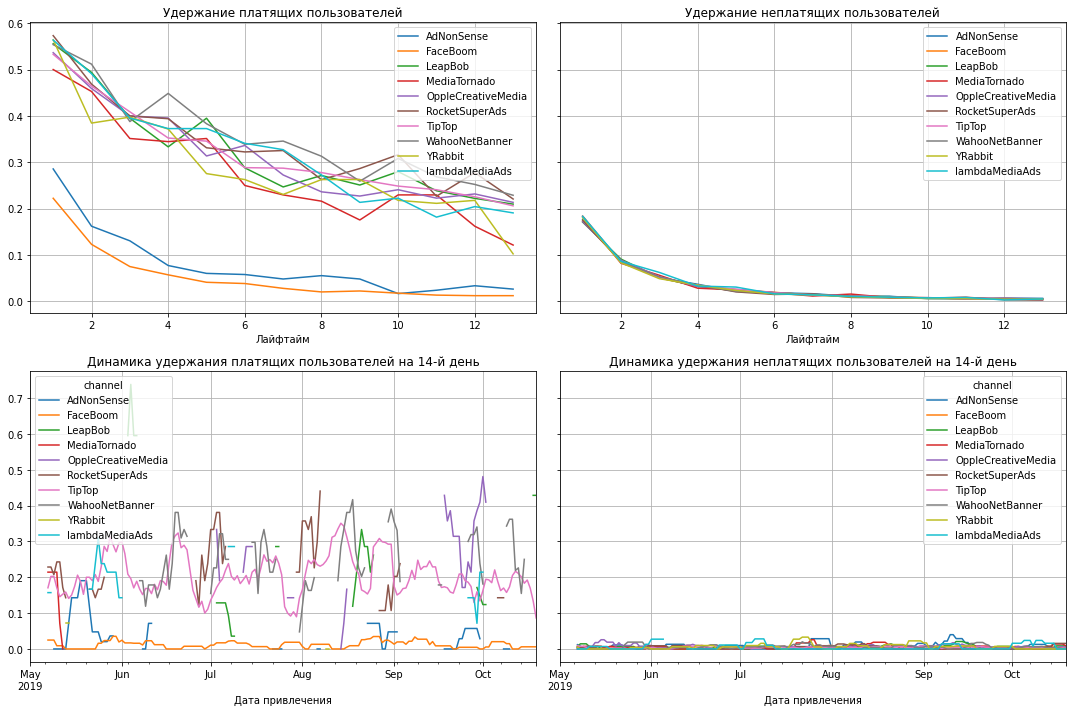

In [60]:
plot_retention(retention_2, retention_history_2, 14, window=7)

По исследованию удержания пользователей в разбивке по каналам видно следующее:
- Удержание платящих пользователей, привличенных через каналы AdNonSense и FaceBoom находится на очень низком уровне, сопоставимом с уровнем удержания для неплатящих пользователей;
- У остальных каналов все в порядке, все находятся примерно на одном уровне по удержанию платящих пользователей;
- Уровень удержания неплатящих пользователей почти одинаковый у всех каналов;
- **На данном этапе исследования теперь ясна проблема неокупаемости пользователей из каналов FaceBoom и AdNonSense, она связана с тем, что у этих каналов крайне низкий уровень удержания платящих пользователей.**

### Исследование удержания в разбивке по странам

In [61]:
retention_raw_3, retention_3, retention_history_3 = get_retention(profiles,
                                                                  visits,
                                                                  datetime(2019, 11, 1).date(),
                                                                  14,
                                                                  dimensions=['region'],
                                                                  ignore_horizon=False)

In [62]:
retention_3

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France                9993  1.0  0.173021  0.091164  0.052036  0.033724   
      Germany               8563  1.0  0.176690  0.084900  0.056172  0.035034   
      UK                   10002  1.0  0.179064  0.088582  0.051390  0.031994   
      United States        52776  1.0  0.177221  0.085626  0.051160  0.033500   
True  France                 523  1.0  0.474187  0.386233  0.323136  0.307839   
      Germany                467  1.0  0.483940  0.402570  0.314775  0.327623   
      UK                     534  1.0  0.483146  0.421348  0.327715  0.299625   
      United States         5786  1.0  0.354822  0.263913  0.212755  0.183719   

                            5         6         7         8         9  \
payer region                                                            
False France         0.022616  0.018213  0.014610  0.012108  0.010607   
      Germany        0.025225  0.019503  0.014014  0.010510  0.009926   
      UK             0.024595  0.017696  0.015897  0.011598  0.008498   
      United States  0.025030  0.018777  0.013813  0.011880  0.009474   
True  France         0.296367  0.246654  0.239006  0.223709  0.204589   
      Germany        0.284797  0.244111  0.220557  0.239829  0.211991   
      UK             0.277154  0.271536  0.247191  0.198502  0.155431   
      United States  0.166263  0.143623  0.136018  0.125475  0.122364   

                           10        11        12        13  
payer region                                                 
False France         0.007805  0.006304  0.005304  0.005504  
      Germany        0.007007  0.005722  0.006890  0.006540  
      UK             0.007299  0.006899  0.006399  0.004499  
      United States  0.007541  0.006423  0.005931  0.004301  
True  France         0.210325  0.168260  0.189293  0.173996  
      Germany        0.233405  0.173448  0.160600  0.134904  
      UK             0.168539  0.192884  0.183521  0.177903  
      United States  0.117179  0.106982  0.103007  0.089526

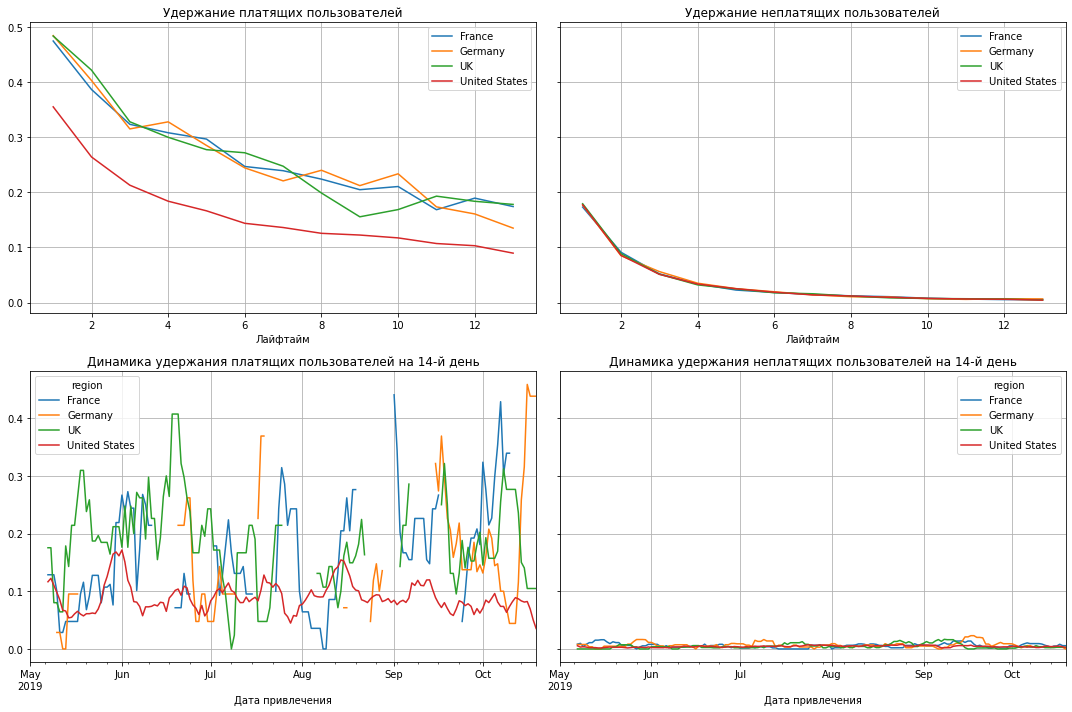

In [63]:
plot_retention(retention_3, retention_history_3, 14, window=7)

- Удержание платящих пользователей в Европейских странах выше по сравнению с США;
- Удержание неплатящих пользователей примерно одинаковое во всех регионах.

### Исследование удержания в разбивке по устройствам

In [64]:
retention_raw_4, retention_4, retention_history_4 = get_retention(profiles,
                                                                  visits,
                                                                  datetime(2019, 11, 1).date(),
                                                                  14,
                                                                  dimensions=['device'],
                                                                  ignore_horizon=False)

In [65]:
retention_4

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        18988  1.0  0.174953  0.086476  0.051928  0.031336   
      Mac            16150  1.0  0.179195  0.085635  0.049412  0.033065   
      PC             16920  1.0  0.174704  0.087234  0.052364  0.034574   
      iPhone         29276  1.0  0.178098  0.086829  0.052774  0.034533   
True  Android         1695  1.0  0.384661  0.298525  0.250147  0.214159   
      Mac             1597  1.0  0.365059  0.284283  0.202880  0.196619   
      PC              1208  1.0  0.421358  0.333609  0.262417  0.261589   
      iPhone          2810  1.0  0.370463  0.277224  0.233808  0.193594   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.024015  0.017485  0.013798  0.011060  0.010006  0.007742   
      Mac      0.023901  0.019505  0.014551  0.012755  0.009102  0.007988   
      PC       0.024232  0.017790  0.014539  0.011170  0.008747  0.007033   
      iPhone   0.025857  0.019436  0.014039  0.011921  0.009940  0.007310   
True  Android  0.206490  0.156342  0.166372  0.146903  0.137463  0.132743   
      Mac      0.172198  0.148403  0.142768  0.136506  0.132123  0.120852   
      PC       0.209437  0.225166  0.192053  0.175497  0.149834  0.163907   
      iPhone   0.185053  0.158363  0.144128  0.135943  0.132384  0.132028   

                     11        12        13  
payer device                                 
False Android  0.006530  0.005477  0.005056  
      Mac      0.006440  0.006254  0.004025  
      PC       0.005437  0.005851  0.005556  
      iPhone   0.006832  0.006319  0.004372  
True  Android  0.110914  0.128614  0.107375  
      Mac      0.115216  0.108954  0.110833  
      PC       0.148179  0.144040  0.124172  
      iPhone   0.120996  0.107473  0.091815

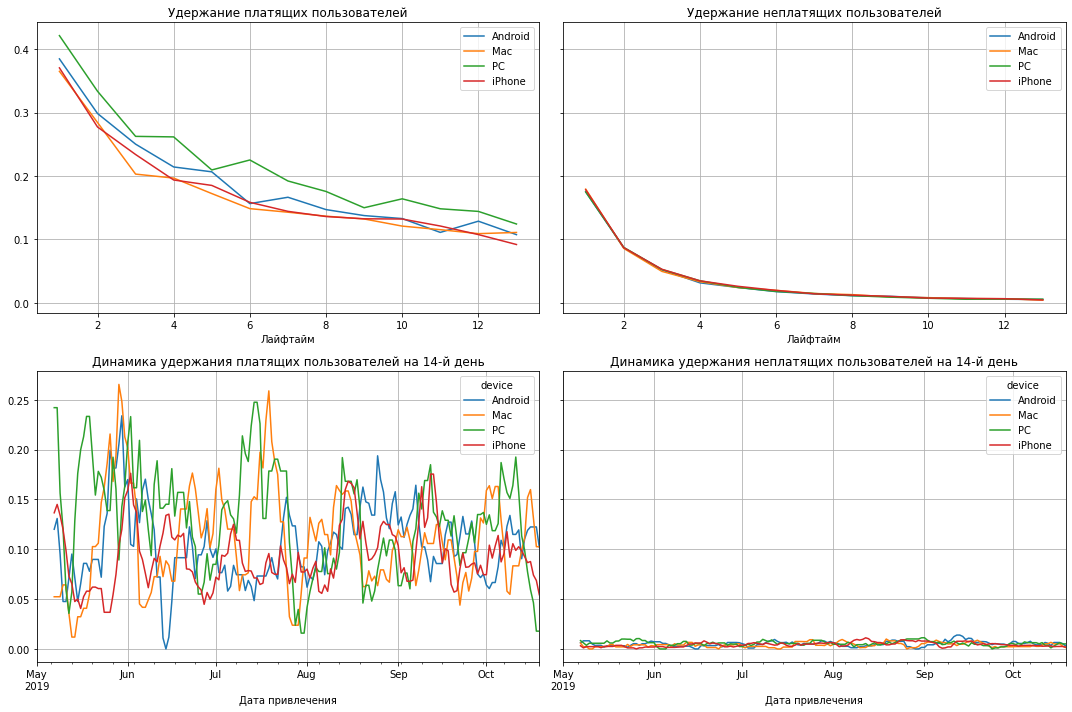

In [66]:
plot_retention(retention_4, retention_history_4, 14, window=7)

**Показатели удержания пользователей всех устройств находятся на приемлимом уровне**, сильных аутсайдеров и лидеров не наблюдается.   
По удержанию незначительно лидируют среди платящих пользователи PC.

## Исследование конверсии пользователей

### Исследование общего уровня конверсии

In [67]:
conversion_raw, conversion, conversion_in_time = get_conversion(profiles,
                                                                orders,
                                                                datetime(2019, 11, 1).date(),
                                                                14,
                                                                dimensions=[],
                                                                ignore_horizon=False)

In [68]:
conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


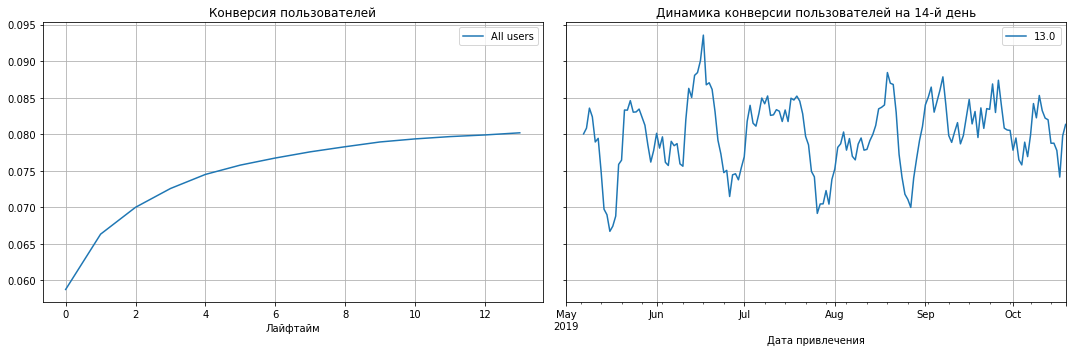

In [69]:
plot_conversion(conversion, conversion_in_time, 14, window=7)

Из общего уровня конверсии можно увидеть, что динамика конверсии держится примерно на одном уровне, а за 2 недели конверсия пользователей от общего числа примерно 0,08.

### Исследование конверсии пользователей с разбивкой по  каналам

In [70]:
conversion_raw_2, conversion_2, conversion_in_time_2 = get_conversion(profiles,
                                                                      orders,
                                                                      datetime(2019, 11, 1).date(),
                                                                      14,
                                                                      dimensions=['channel'],
                                                                      ignore_horizon=False)

In [71]:
conversion_2

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.086980,0.094003,0.096704,0.100486,0.102107,0.103998,0.105348,0.105348,0.105889,0.106159,0.106159,0.106969,0.107509,0.107509
FaceBoom,27544,0.102091,0.109134,0.111494,0.113346,0.114762,0.115452,0.116468,0.116976,0.117557,0.118175,0.118465,0.118864,0.119082,0.119373
LeapBob,8103,0.016660,0.020610,0.024065,0.025052,0.026040,0.026657,0.026904,0.027644,0.028261,0.028631,0.028878,0.029002,0.029125,0.029248
MediaTornado,4167,0.023278,0.027358,0.028078,0.029998,0.030478,0.031198,0.031198,0.032397,0.032637,0.032637,0.033357,0.033357,0.033357,0.033357
OppleCreativeMedia,8139,0.017324,0.019904,0.021501,0.023099,0.023713,0.024573,0.025310,0.025556,0.025556,0.025802,0.025925,0.026047,0.026047,0.026293
RocketSuperAds,4251,0.034110,0.047283,0.053870,0.059280,0.063750,0.065632,0.067278,0.068690,0.069866,0.071513,0.072924,0.073159,0.073394,0.073630
TipTop,18498,0.056709,0.069413,0.076062,0.080711,0.084171,0.086604,0.087685,0.089361,0.090550,0.091577,0.092334,0.092767,0.093199,0.093740
WahooNetBanner,8082,0.031180,0.038481,0.043306,0.045038,0.046894,0.048008,0.048874,0.049740,0.050359,0.051101,0.051472,0.051596,0.051720,0.052091
YRabbit,4102,0.025841,0.028766,0.031204,0.032179,0.033398,0.034130,0.034861,0.035349,0.035836,0.036324,0.036324,0.036568,0.036811,0.037055


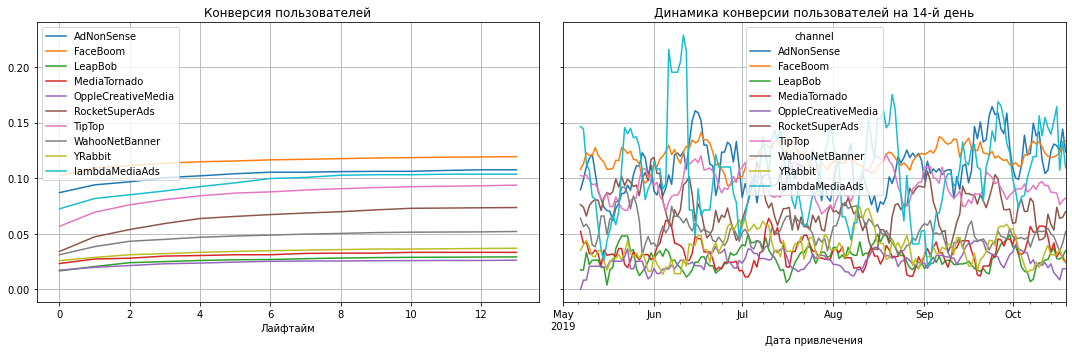

In [72]:
plot_conversion(conversion_2, conversion_in_time_2, 14, window=7)

Самые высокие показатели конверсии у пользователей, привлеченных через каналы:   
- FaceBoom  
- lambdaMediaAds  
- AdNonSense  
- TipTop  

### Исследование конверсии пользователей с разбивкой по регионам

In [73]:
conversion_raw_3, conversion_3, conversion_in_time_3 = get_conversion(profiles,
                                                                      orders,
                                                                      datetime(2019, 11, 1).date(),
                                                                      14,
                                                                      dimensions=['region'],
                                                                      ignore_horizon=False)

In [74]:
conversion_3

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.033092,0.037467,0.040985,0.042697,0.044313,0.045359,0.046120,0.046405,0.046976,0.047547,0.047642,0.048117,0.048307,0.048402
Germany,9030,0.032337,0.038760,0.041528,0.043854,0.045072,0.046512,0.047398,0.048283,0.049059,0.049612,0.049723,0.049834,0.049945,0.050498
UK,10536,0.034074,0.039104,0.042426,0.044039,0.045368,0.046412,0.047551,0.048121,0.048405,0.048595,0.048975,0.049070,0.049165,0.049165
United States,58562,0.071873,0.080650,0.084560,0.087497,0.089700,0.091032,0.092022,0.093013,0.093798,0.094566,0.095096,0.095454,0.095728,0.096069


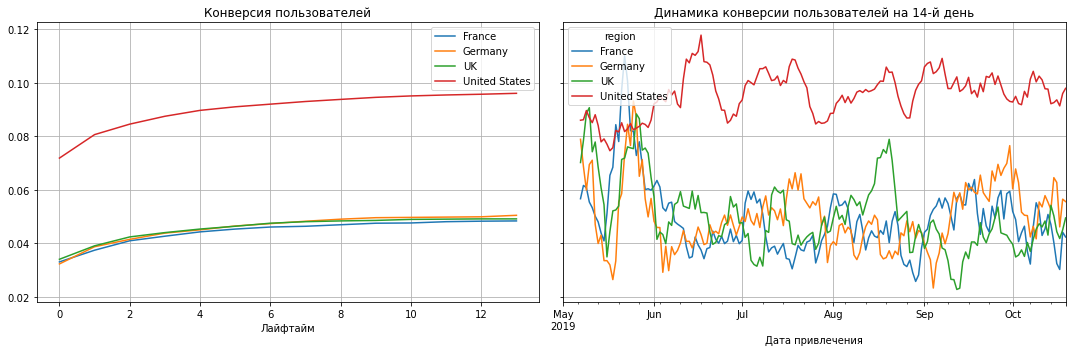

In [75]:
plot_conversion(conversion_3, conversion_in_time_3, 14, window=7)

По анализу конверсии с разбивкой по регионам видно, что пользователи из США конвертируются в покупаетелей значительно лучше по сравнению с пользователями из Евпропы (конверсия 0,096 против ~0,05 на 14 день соответсвенно).

### Исследование конверсии пользователей с разбивкой по устройствам

In [76]:
conversion_raw_4, conversion_4, conversion_in_time_4 = get_conversion(profiles,
                                                                      orders,
                                                                      datetime(2019, 11, 1).date(),
                                                                      14,
                                                                      dimensions=['device'],
                                                                      ignore_horizon=False)

In [77]:
conversion_4

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.058309,0.066141,0.070058,0.072378,0.074506,0.075714,0.076923,0.077552,0.078083,0.078809,0.079147,0.079437,0.079776,0.079921
Mac,17747,0.064349,0.072970,0.076802,0.079281,0.080971,0.082267,0.083225,0.084014,0.084747,0.085648,0.086268,0.086493,0.086606,0.087057
PC,18128,0.046613,0.053067,0.055991,0.058142,0.060293,0.061562,0.062665,0.063438,0.064100,0.064431,0.064707,0.064872,0.065093,0.065368
iPhone,32086,0.062800,0.070249,0.074113,0.077136,0.078944,0.080253,0.081001,0.082061,0.082871,0.083526,0.083962,0.084429,0.084648,0.084959


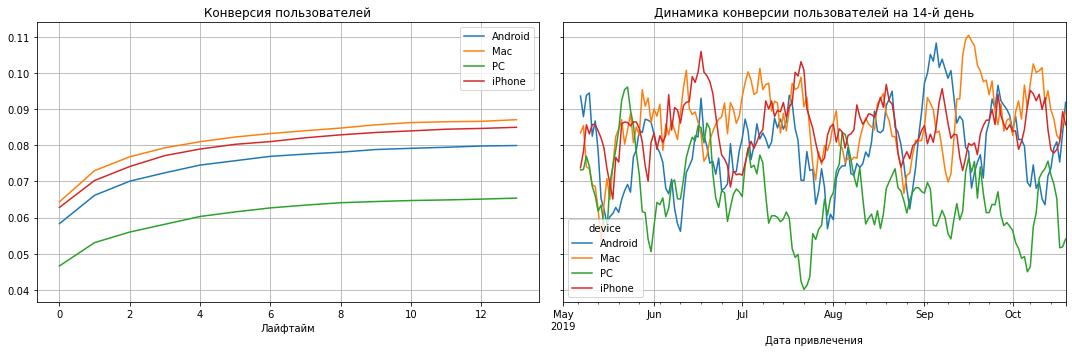

In [78]:
plot_conversion(conversion_4, conversion_in_time_4, 14, window=7)

Исследование конверсии пользователей показало, что пользователи продуктов Apple лидируют в коэф. конверсии, чуть остают пользователи с Android, при этом пользователи PC расположились значительно ниже. Вероятно, свою роль при этом сыграл Apple pay и Android pay.

## Исследуем регион США на CAC, ROI и LTV c разбивкой по каналам:

In [79]:
usa = profiles.query('region=="United States"')

In [80]:
ltv_raw_usa, ltv_usa, ltv_history_usa, roi_usa, roi_history_usa = get_ltv(usa,
                                                                  orders,
                                                                  datetime(2019, 11, 1).date(),
                                                                  14, 
                                                                  dimensions=['channel'])

In [81]:
roi_usa

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
FaceBoom,27544,1.113419,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
MediaTornado,4167,0.219035,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
RocketSuperAds,4251,0.417431,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,2.757774,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
YRabbit,4102,0.217087,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


In [82]:
roi_usa['part_of_users, %'] = roi_usa['cohort_size'] / roi_usa['cohort_size'].sum() * 100
roi_usa['part_of_users, %'].to_frame()

,"part_of_users, %"
channel,
FaceBoom,47.033913
MediaTornado,7.115536
RocketSuperAds,7.258973
TipTop,31.587036
YRabbit,7.004542


Как оказалось, проблемные каналы FaceBoom и TipTop привлекали в США абсолютное большинство пользователей. Именно поэтому это привело к таким проблемам с окупаемостью в США, а также к проблемам с общей окупаемостью клиентов во всех регионах.  
Для региона США необходимо минимизировать/убрать полностью привлечение через каналы FaceBoom (слишком низкое удержание) и TipTop (слишком высокая стоимость рекламы), а свободные средства направить на каналы с хорошей окупаемостью MediaTornado, RocketSuperAds и YRabbit.

# 6. Выводы

**Причины неэффективности привлечения пользователей:**  
Основной причиной неэффективности привлечения пользователей является расходование маркетинговых средств на привлечение пользователей через каналы AdNonSense, TipTop и FaceBoom. Так как пользователи, привлеченные через данные каналы, не окупались в течение двухнедельного периода. Тем самым они "портили" общую окупаемость.  
Если исключить данные убыточные каналы, то маркетинговую кампанию можно считать успешной, потому что общая окупаемость будет достигаться в таком случае будет уже на второй день. Дополнительно исследование без убыточных каналов показало, что окупаемость будет такой же быстрой во всех исследуемых регионах.

**Рекомендации:**  
Минимизировать или полностью исключить затраты на привлечение пользователей через каналы AdNonSense, TipTop и FaceBoom. С точки зрения диверсификации рекламной кампании лучше будет минимизировать расходы в этих каналах, чем полностью их исключать. Свободные денежные средства направить на самые успешные с точки зрения окупаемости каналы, в числе которых: YRabbit, lambdaMediaAds, MediaTornado и другие каналы.  
Для региона США необходимо минимизировать привлечение через каналы FaceBoom (слишком низкое удержание) и TipTop (слишком высокая стоимость рекламы), а свободные средства направить на каналы с хорошей окупаемостью MediaTornado, RocketSuperAds и YRabbit.